## Dry Bean Type Prediction

👉 We are from **<font color= lightblue>"Group 10"</font>**</n>. Our group member consists the following:

| No | Student Name | Student ID |
|----|---|---|
| 1  | YangHao | s2148678 |
| 2  | Md Tuhin Hossain | S2116205 |
| 3  | Raimi Ridzuan | S2186754 |
| 4  | Muhammad Syafiq Naqiuddin Bin Nil amri | S2146201 |
| 5  | Muhammad Dimas Hidayatullah bin Ikhsan | 17079797 |




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

# For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Machine learning libary
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve

# Data Understanding & Preprocessing

In [ ]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

### Data Dimension

In [ ]:
data.shape

(13611, 17)

The dataset contains:
*   13611 rows of data
*   17 different columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


### Missing data

In [ ]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
data.isnull().sum().any()

False

The dataset contain no missing data

### Data duplication

In [ ]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  68


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ


In [ ]:
data.drop_duplicates(inplace = True)

There are 68 duplicated rows, all duplicated rows were removed.

In [ ]:
data.shape

(13543, 17)

The new dimension of dataset have 13543 rows and 17 columns

## Unique value

In [ ]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data)

34594    4
36109    4
52266    4
29709    4
28122    4
        ..
73969    1
73973    1
74034    1
74044    1
42159    1
Name: Area, Length: 12011, dtype: int64
_____________________________________________________________________________
683.341     3
968.674     2
670.479     2
800.405     2
687.923     2
           ..
1041.011    1
1017.763    1
1037.806    1
1034.771    1
772.237     1
Name: Perimeter, Length: 13416, dtype: int64
_____________________________________________________________________________
208.178117    1
299.536352    1
301.858498    1
303.248379    1
294.946255    1
             ..
427.220651    1
402.000670    1
412.245965    1
406.680186    1
295.142741    1
Name: MajorAxisLength, Length: 13543, dtype: int64
_____________________________________________________________________________
173.888747    1
197.308325    1
195.156389    1
194.386687    1
199.788011    1
             ..
217.619608    1
232.230331    1
226.372175    1
231.087063    1
182.204716    1
Nam

## Univariate Analysis

### Data distribution for independent varibiables.

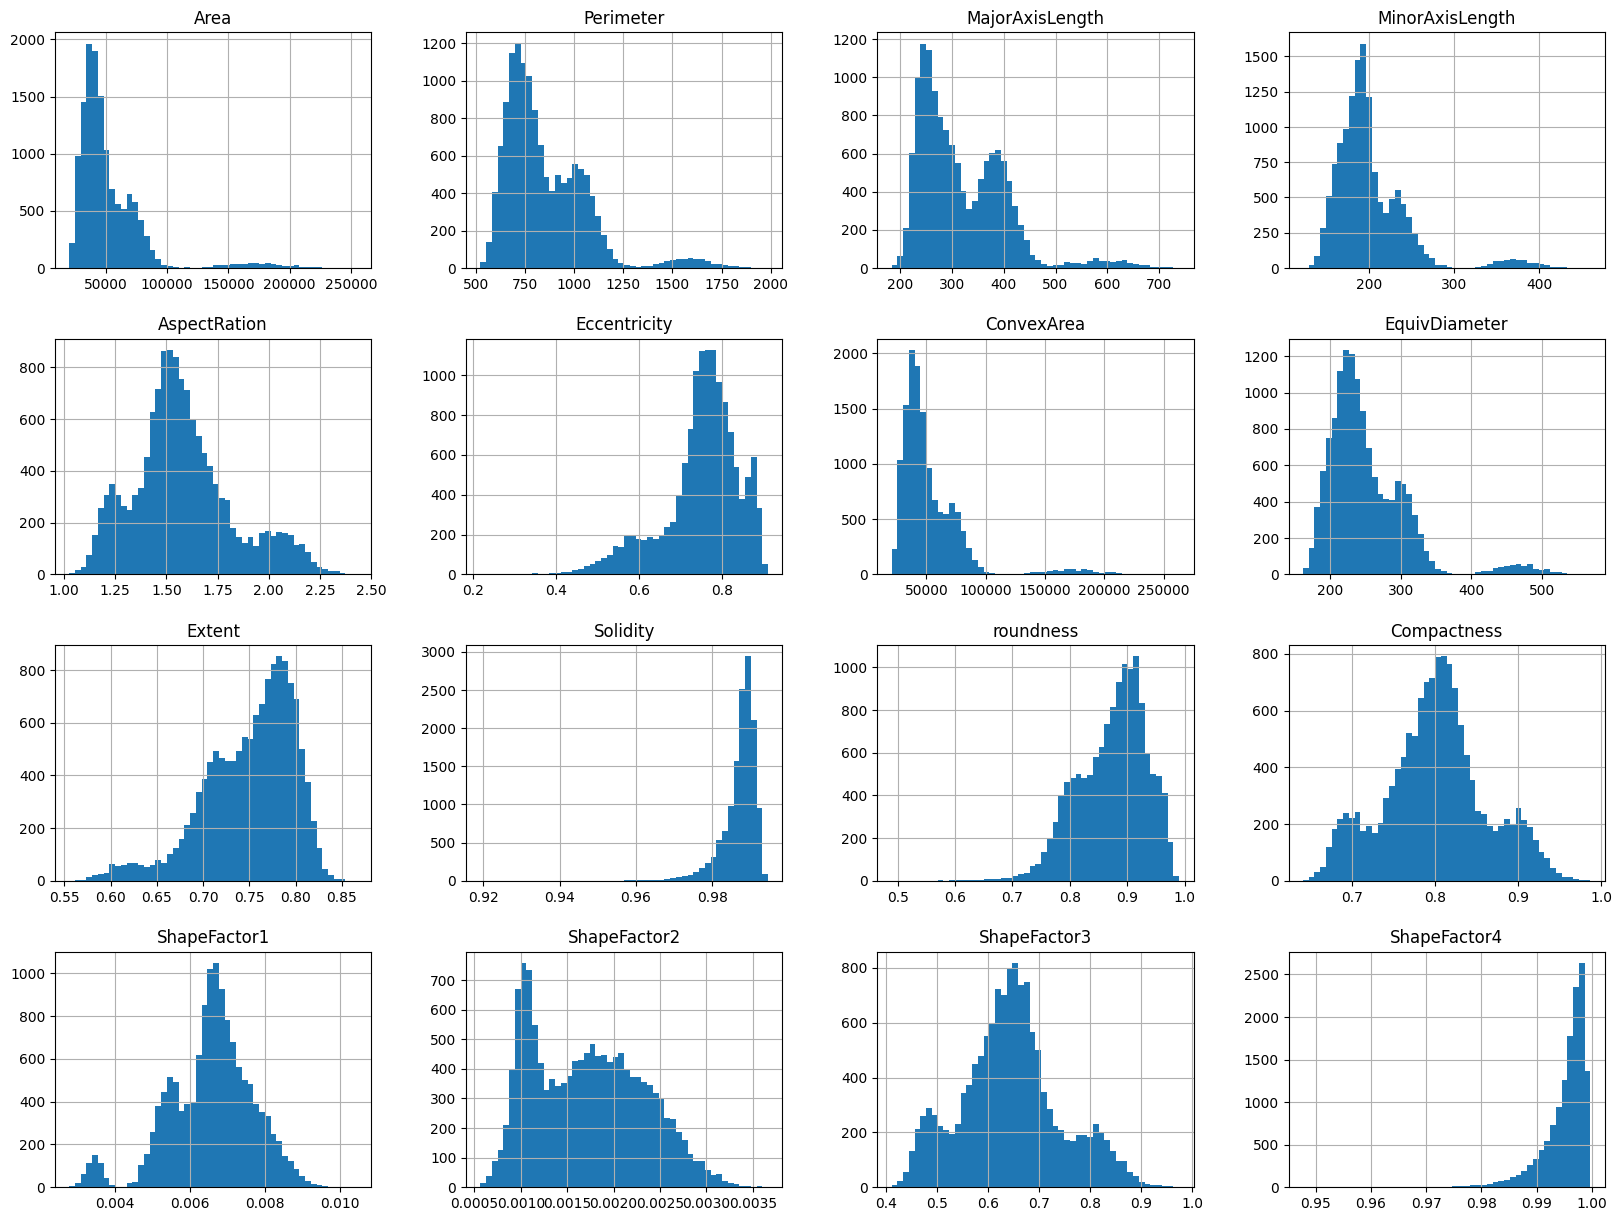

In [ ]:

data.hist(bins=50, figsize=(20,15))
plt.show()

### Data distribution for dependent variable

In [ ]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

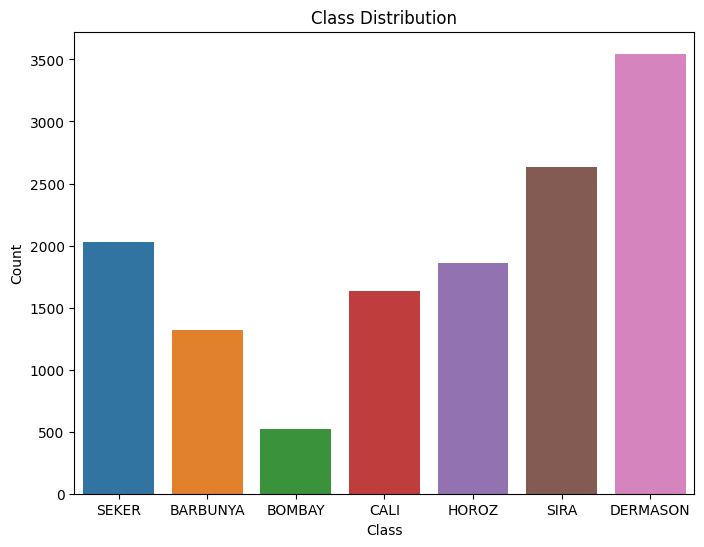

In [ ]:
#Distribution of class variables and sample size
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.xlabel('Class')
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

Dataset is unbalance, where majority class is Dermason while minority class is Bombay.

## Outlier Analysis

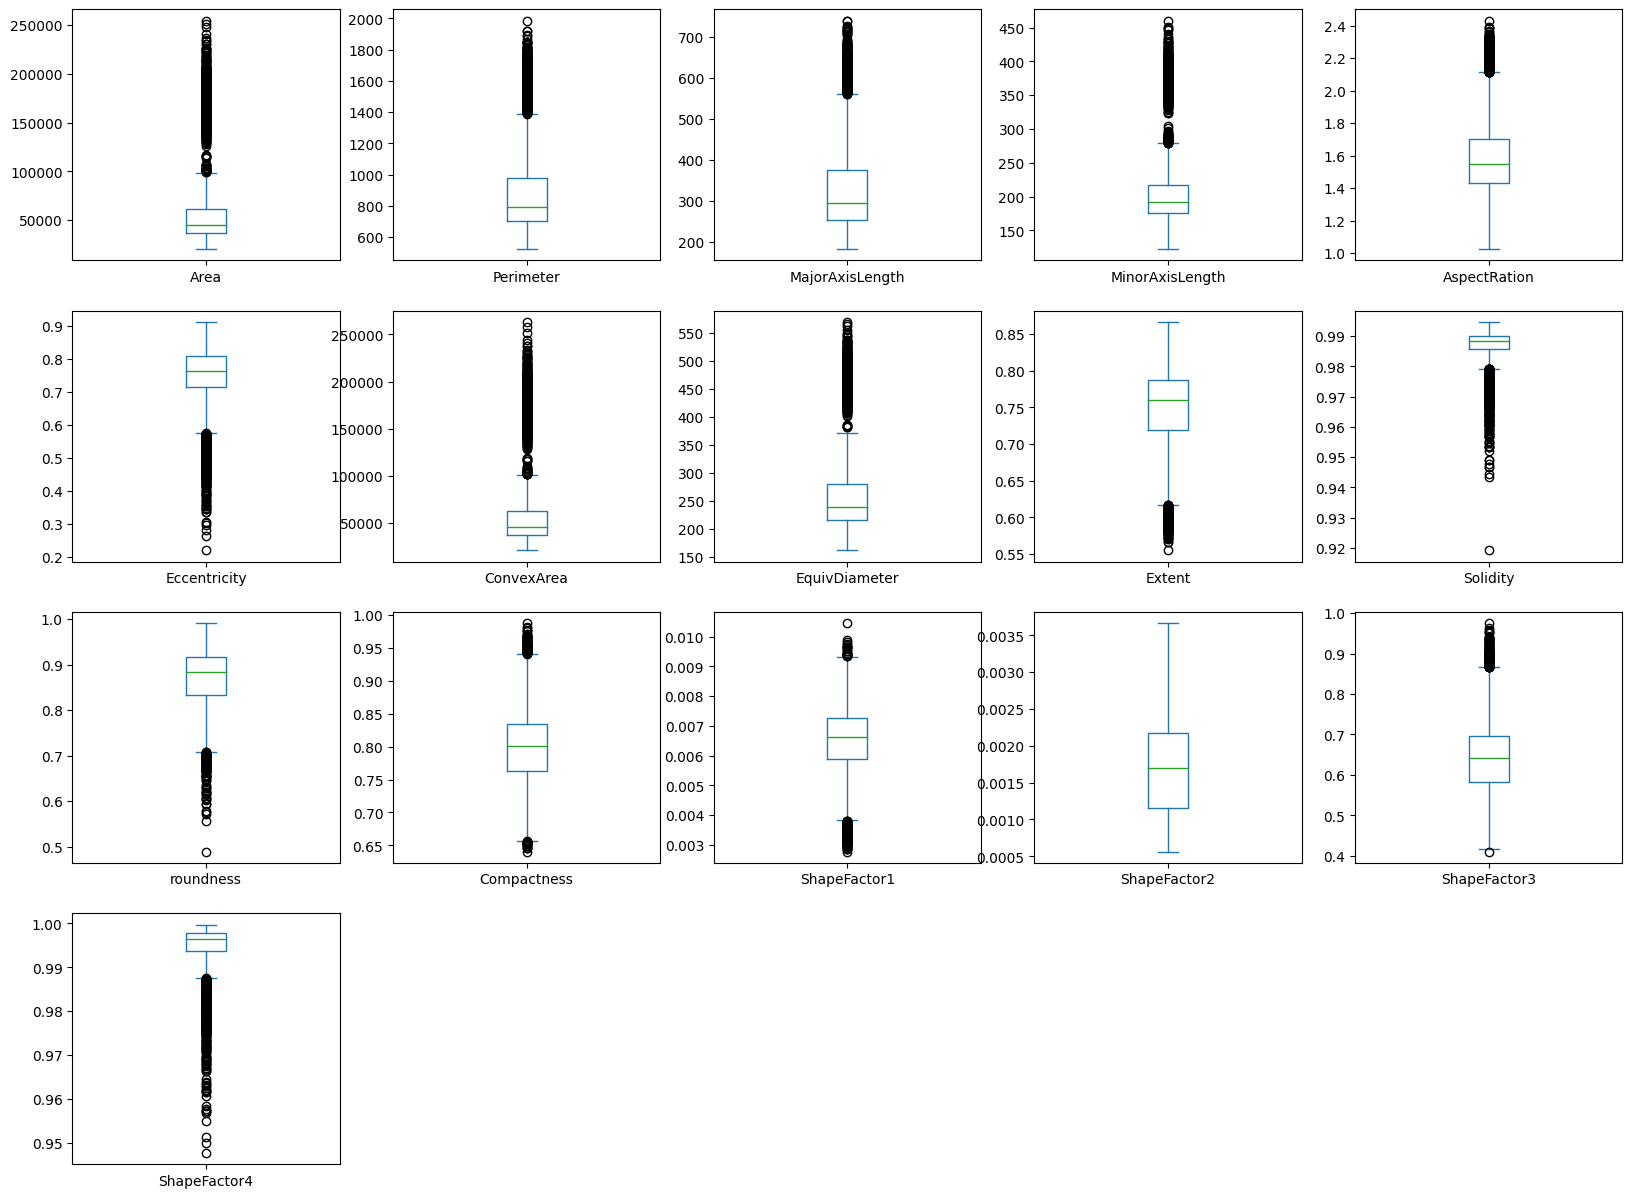

In [ ]:
#Boxplot of each feature
#Observe the distribution and outliers

data.plot(kind='box', subplots=True, layout=(4,5), figsize=(20,15))
plt.show()

In [ ]:
def detect_outliers(data, columns, threshold=3):
    outliers = []
    for column in columns:
        mean = np.mean(data[column])
        std = np.std(data[column])
        lower_limit = mean - (std * threshold)
        upper_limit = mean + (std * threshold)
        outliers.extend(data[(data[column] < lower_limit) | (data[column] > upper_limit)].index)
    return outliers

columns_to_check = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']

# Detecting outliers
outliers = detect_outliers(data, columns_to_check)
data_out = data.drop(outliers)

In [ ]:
data_out.shape

(12414, 17)

In [ ]:
outliers_count = data.shape[0] - data_out.shape[0]
outliers_count

1129

In [ ]:
data_out['Class'].value_counts()

DERMASON    3520
SIRA        2623
SEKER       1896
HOROZ       1562
CALI        1543
BARBUNYA    1259
BOMBAY        11
Name: Class, dtype: int64

In [ ]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

There are 1129 outliers data. Most of outliers come from minority class which is Bombay. Since removing outliers reduced the data further. So far, we keep all the outliers, if the models is low accuracy or overfitting, we will remove the outliers, otherwise, we simply ignored it.

## Multivariate Analysis

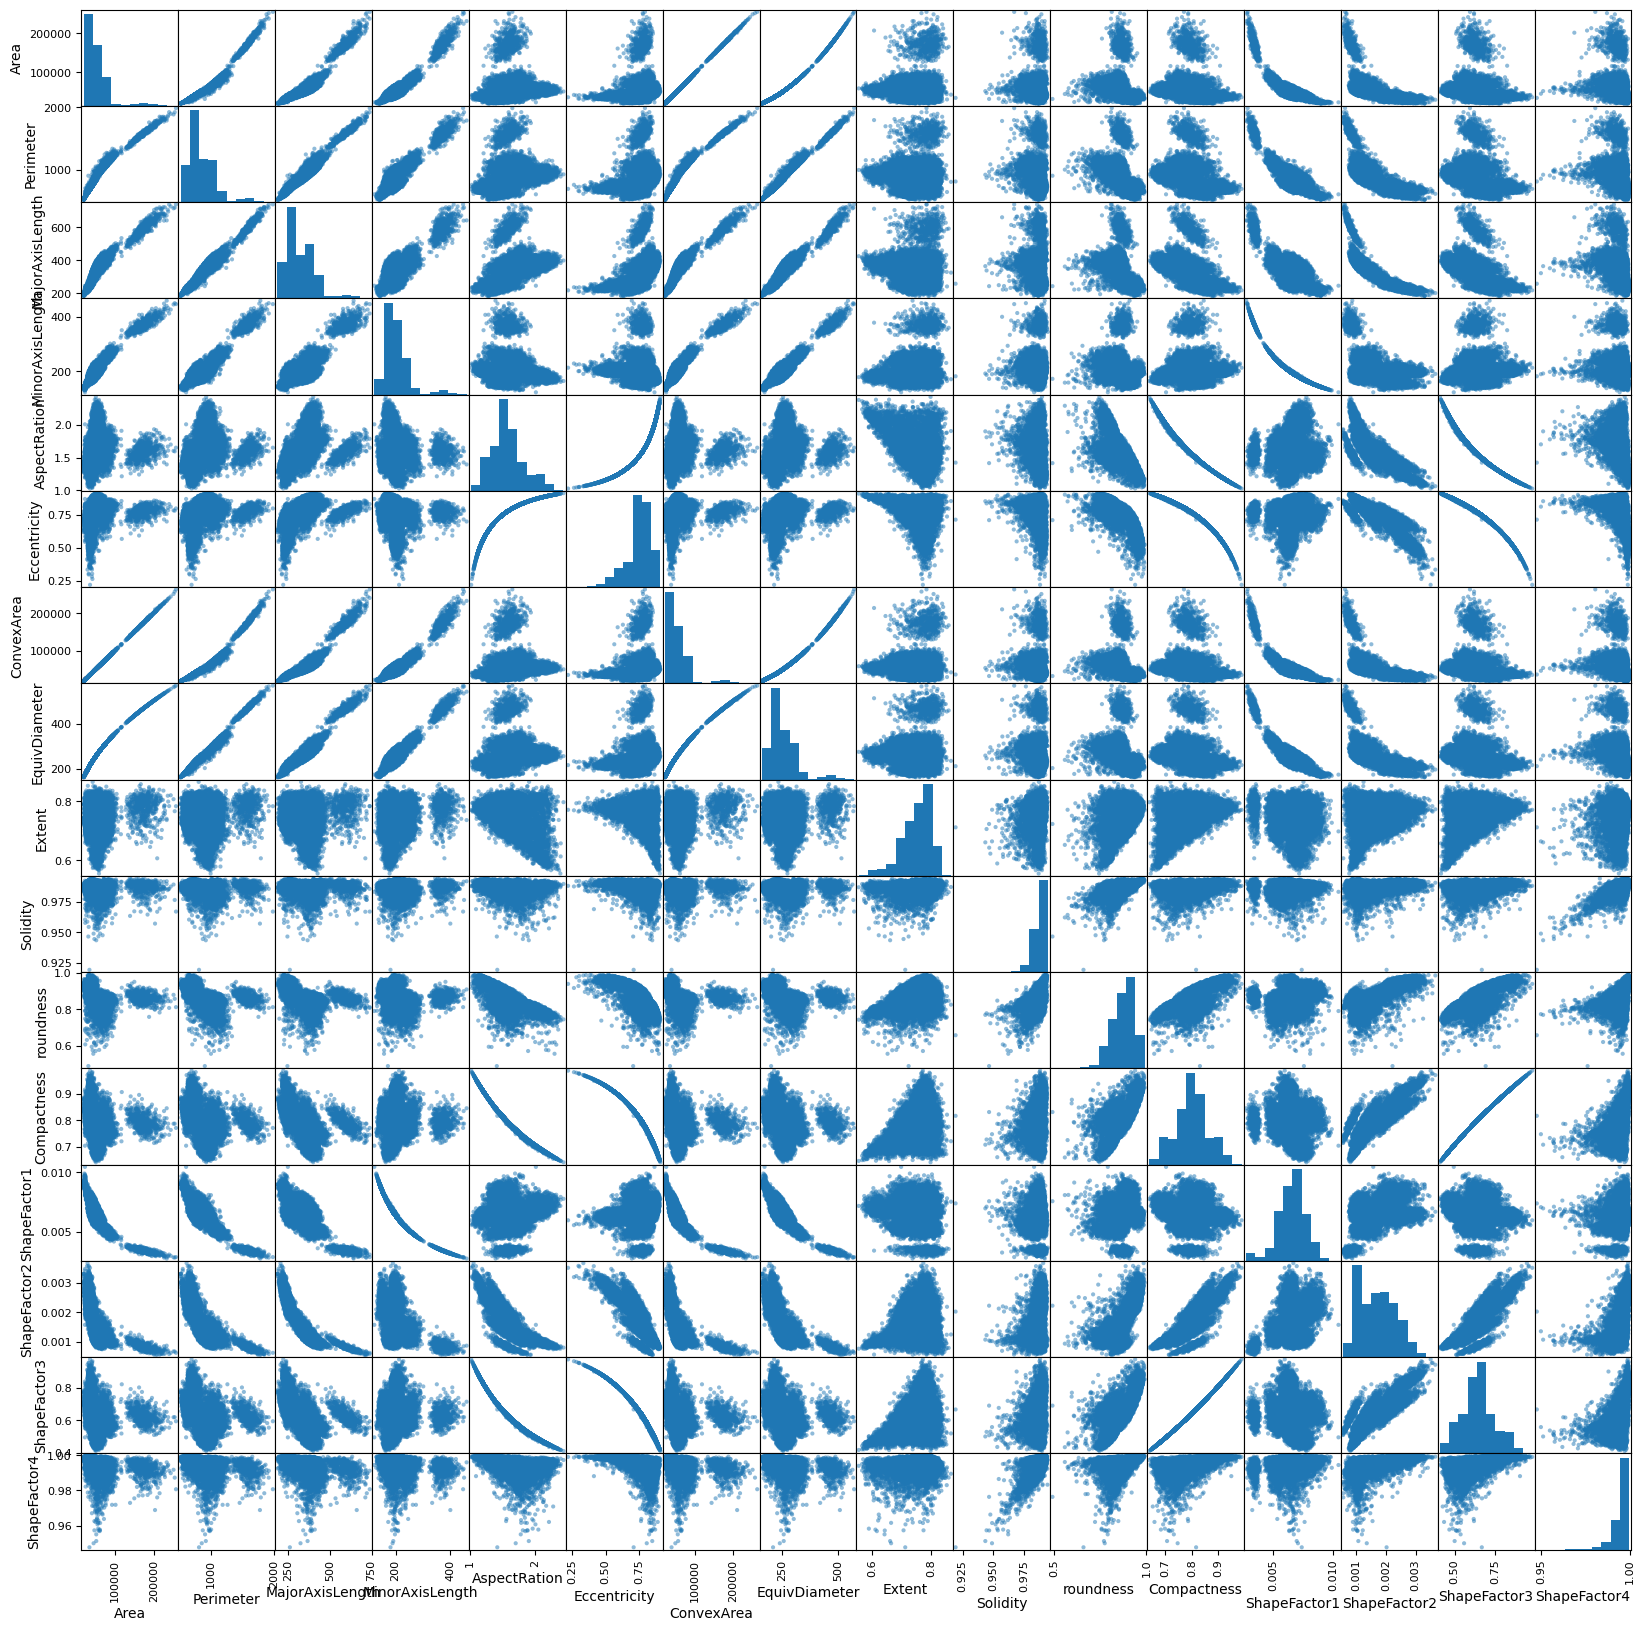

In [ ]:
#The scatter plot matrix between each variable in the data set.

#Observe linear or nonlinear relationships between variables and possible outliers or clustering

pd.plotting.scatter_matrix(data, figsize=(20, 20))
plt.show()

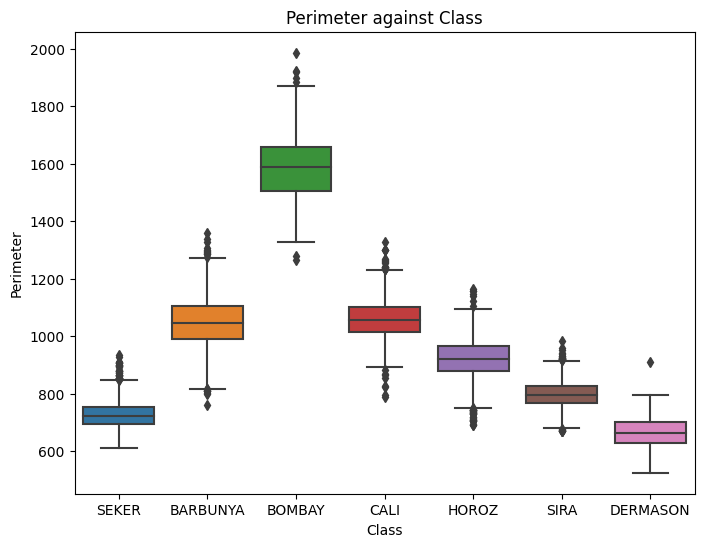

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y="Perimeter", data=data)
plt.xlabel('Class')
plt.ylabel("Perimeter")
plt.title("Perimeter against Class")
plt.show()

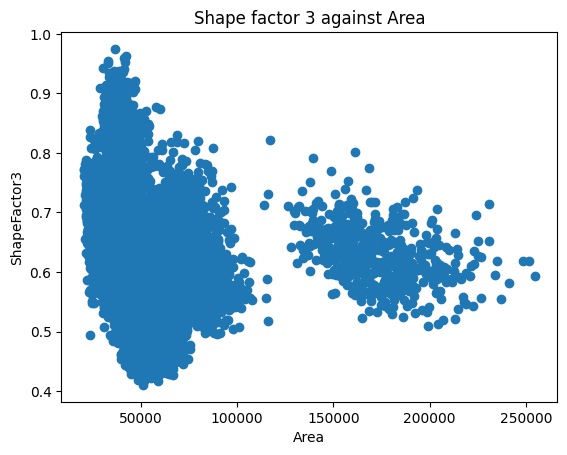

In [ ]:
# scatter diagram
plt.scatter(data['Area'], data['ShapeFactor3'])
plt.xlabel('Area')
plt.ylabel('ShapeFactor3')
plt.title("Shape factor 3 against Area")
plt.show()

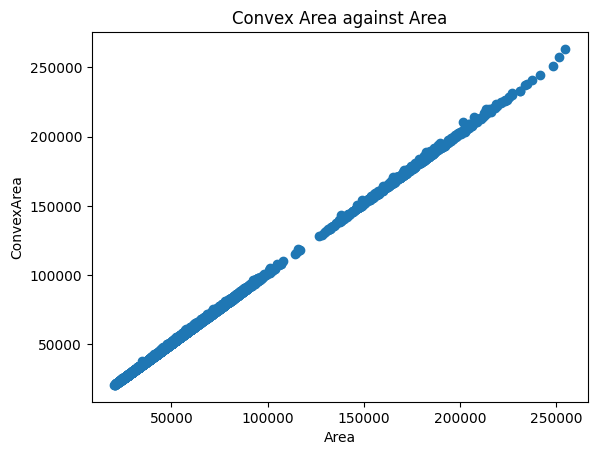

In [ ]:
# scatter diagram
plt.scatter(data['Area'], data['ConvexArea'])
plt.xlabel('Area')
plt.ylabel('ConvexArea')
plt.title("Convex Area against Area")
plt.show()

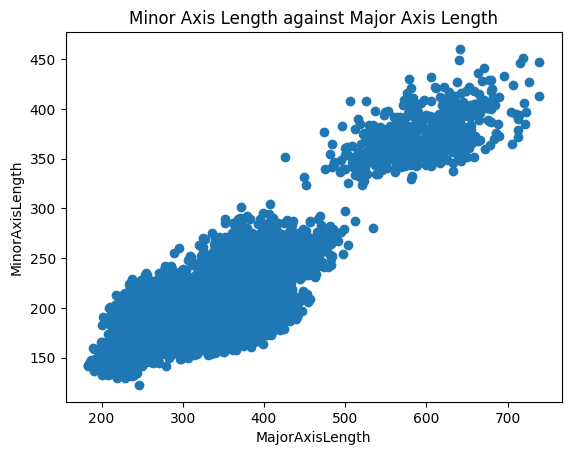

In [ ]:
# scatter diagram
plt.scatter(data['MajorAxisLength'], data['MinorAxisLength'])
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')
plt.title("Minor Axis Length against Major Axis Length")
plt.show()

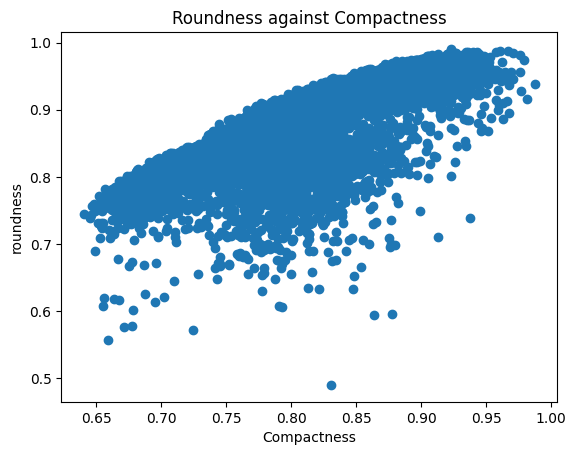

In [ ]:
# scatter diagram
plt.scatter(data['Compactness'], data['roundness'])
plt.xlabel('Compactness')
plt.ylabel('roundness')
plt.title("Roundness against Compactness")
plt.show()

## Data encoding

In [ ]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data["Class"]=l1.fit_transform(data["Class"])


In [ ]:
data['Class'].value_counts()

3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: Class, dtype: int64

## Correlation Analysis

In [ ]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019,-0.475413
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215,-0.508315
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464,-0.456515
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402,-0.458347
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598,-0.119588
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611,-0.202824
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302,-0.477624
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693,-0.481452
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622,-0.030855
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150,0.323356


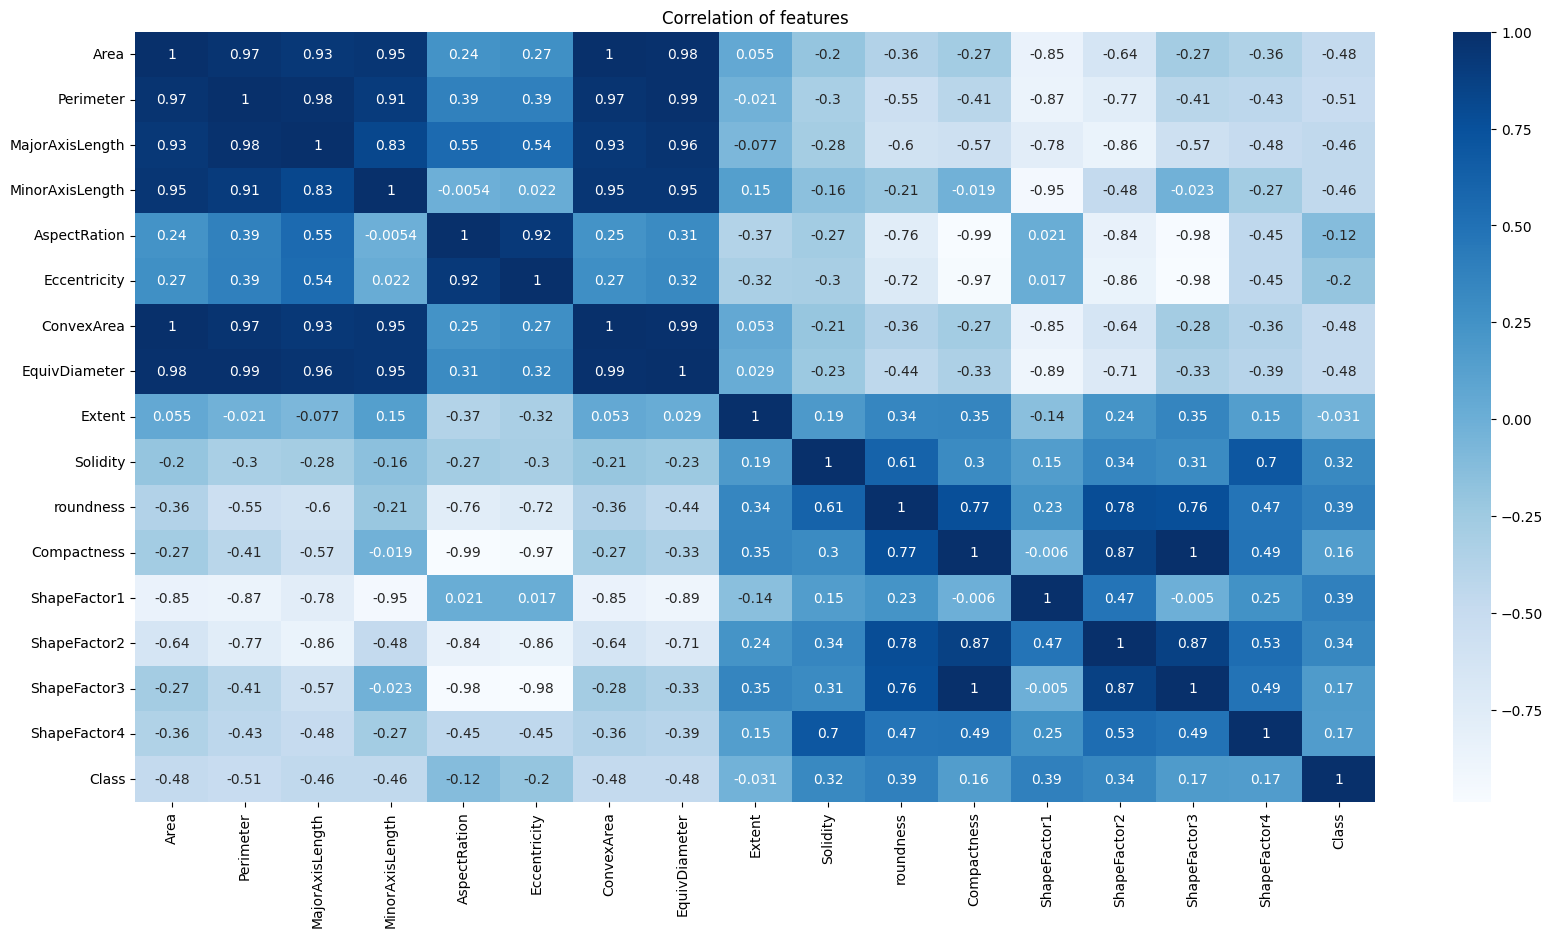

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot=True , cmap ='Blues')
plt.title("Correlation of features")
plt.show()

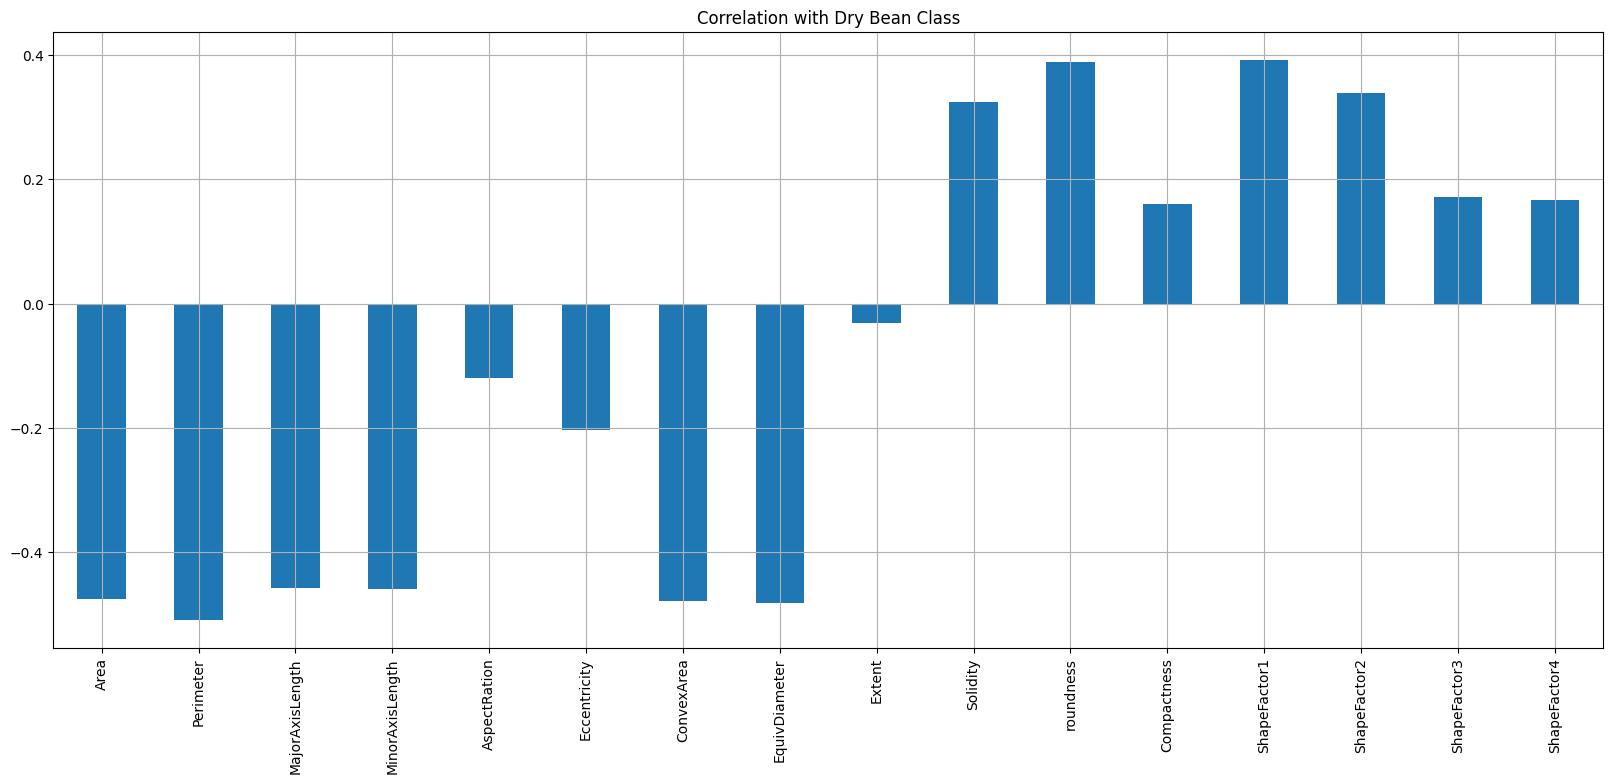

In [ ]:
data.drop('Class', axis=1).corrwith(data.Class).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Dry Bean Class");

Extent, Eccentricity, AspectRation, Compactness, ShapeFactor3, ShapeFactor4 are less correlated with Class.

## Data scaling and splitting

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.utils.np_utils import to_categorical

X = data.drop('Class', axis=1)
Y = data['Class']

scaler = MinMaxScaler() #better
# scaler = StandardScaler()
# scaler = MaxAbsScaler()
X = scaler.fit_transform(X)
X

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.83304879, 0.75099637,
        0.98061988],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.96731548, 0.88498696,
        0.97497943],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.80094229, 0.7361995 ,
        0.98719587],
       ...,
       [0.09273856, 0.16060492, 0.17638393, ..., 0.42701895, 0.4722397 ,
        0.9430251 ],
       [0.09277272, 0.16365701, 0.17970258, ..., 0.41532999, 0.45691893,
        0.91334231],
       [0.09282396, 0.16944765, 0.20088207, ..., 0.34689166, 0.36476185,
        0.9701623 ]])

The data gets split into features (X) and labels (Y), where 'Class' most likely represents the type of bean. Then, MinMaxScaler from the sklearn library normalizes the feature data. This normalization ensures all bean characteristics have a uniform scale, which optimizes the performance of subsequent machine learning models.


## Data upsampling

In [ ]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

X = pd.DataFrame(X, columns=data.drop('Class', axis=1).columns)
X.shape

(24822, 16)

In [ ]:
Y.value_counts()

5    3546
0    3546
1    3546
2    3546
4    3546
6    3546
3    3546
Name: Class, dtype: int64

Data now has 24822 rows and 16 columns for X data (One column is split to Y data). All class now balance.

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Anova feature selection
# feature selection using anova
# fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
# X = fs.fit_transform(X, Y)

# Kendall Feature Selection
# data_corr = data.copy()
# cor = data_corr.corr(method='kendall')
# cor_target = abs(cor["Class"])
# Selecting highly correlated features
# Kendall_features = cor_target[cor_target>=0.2]
# Kendall_features

# X = data_corr[Kendall_features.index.drop('Class')]
# Y = data_corr['Class']


# PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(X)
# X = pd.DataFrame(data = principalComponents
#             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

No feature selection since feature selection reducing accuracy of models.

## Data Splitting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 42)

# Data Modelling

## Modelling and fitting analysis for classical machine learning

In [ ]:
models = [LogisticRegression(),
         SVC(),
         GaussianNB(),
         KNeighborsClassifier(),
         ExtraTreeClassifier(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         LGBMClassifier(),
         XGBClassifier()
         ]

names = ['LogisticRegression',
         'SVM',
         'GuassianNaiveBayes',
         'K-NN',
         'ExtraTree',
         'RandomForest',
         'DecisionTree',
         'Lightgbm',
         'Xgboost'
         ]


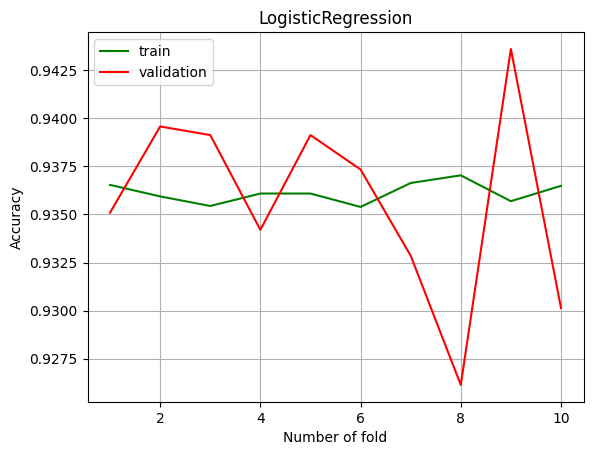

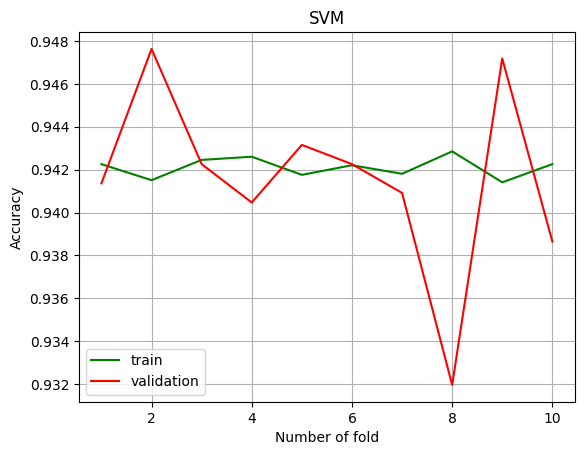

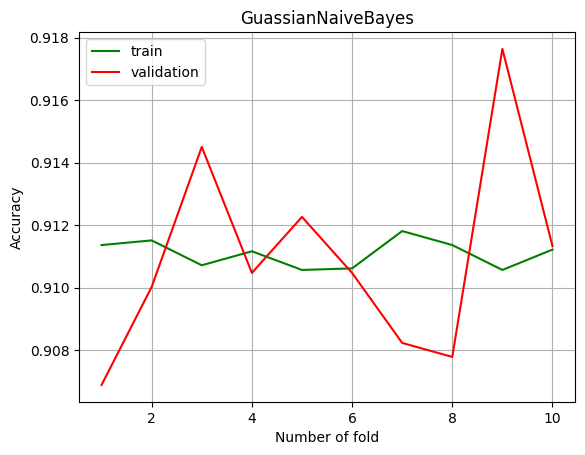

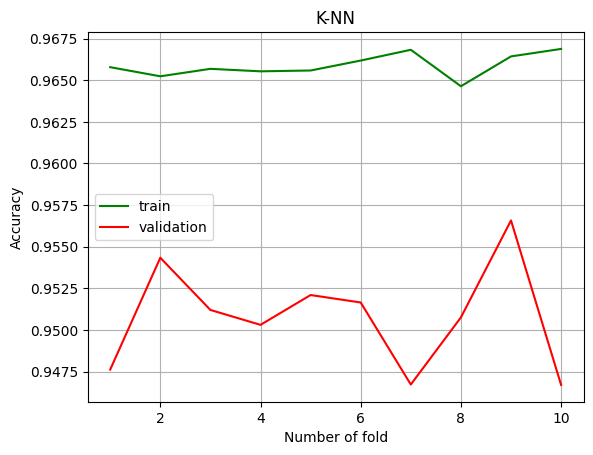

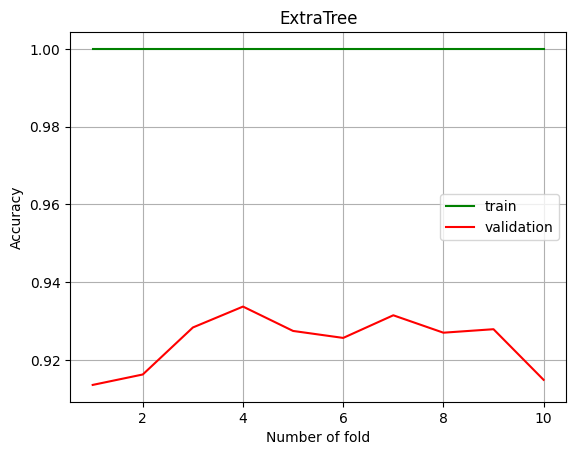

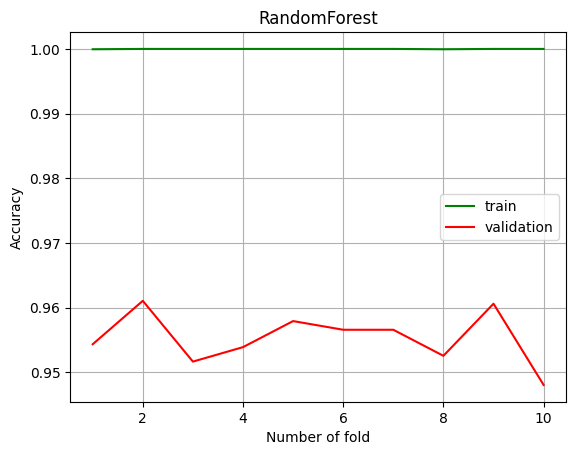

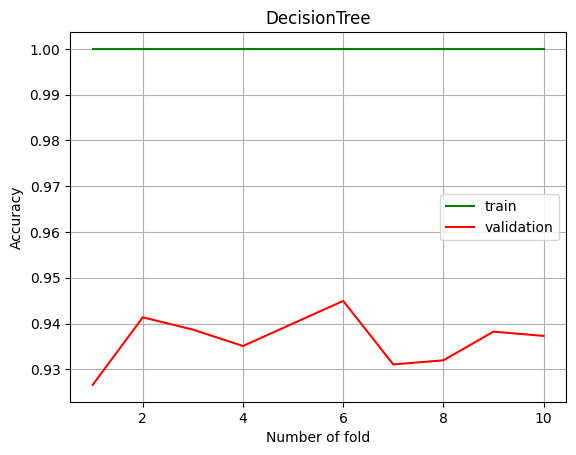

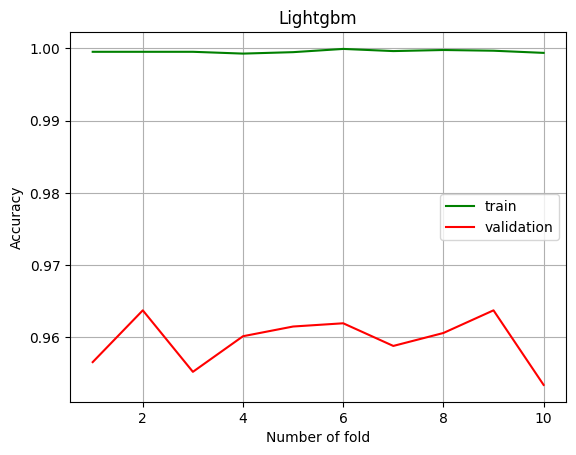

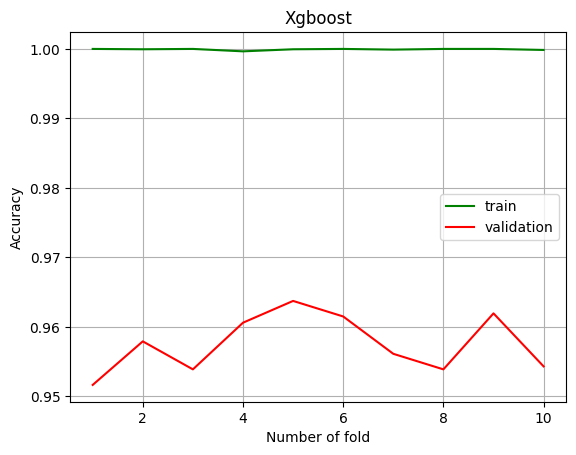

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt

kf = StratifiedKFold(n_splits=10)
acc_train = []
acc_val = []
i = 0

for model in models:
  for train_index, val_index in kf.split(X_train,Y_train):

    X_train_val, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_val, Y_val = Y_train.iloc[train_index], Y_train.iloc[val_index]
    model.fit(X_train_val, Y_train_val)
    Y_train_pred = model.predict(X_train_val)
    Y_val_pred = model.predict(X_val)
    acc_train.append(metrics.accuracy_score(Y_train_val, Y_train_pred))
    acc_val.append(metrics.accuracy_score(Y_val, Y_val_pred))
  folds = range(1, kf.get_n_splits() + 1)
  plt.plot(folds, acc_train, color='green', label='train')
  plt.plot(folds, acc_val, color='red', label='validation')
  plt.title(names[i])
  i += 1
  plt.legend()
  plt.grid()
  plt.xlabel('Number of fold')
  plt.ylabel('Accuracy')
  plt.show()
  acc_train.clear()
  acc_val.clear()

KNN, Extra Tree, Random Forest, Decision Tree, Lightgbm and Xgboost are overfitting. Logistic Regression, Gaussian and SVM are good fit.

## Modelling and fitting analysis for modern machine learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

in_dim = len(data.columns)-1

nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim = in_dim))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(7, activation='softmax'))
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#hist = model.fit(X_train, to_categorical(Y_train), epochs=40, batch_size=10)

#for i, m in enumerate(model.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))

In [ ]:
no_epochs = 30
nn = nn_model.fit(X_train, to_categorical(Y_train),
          batch_size= 10,
          epochs= no_epochs,
          verbose= 1,
          validation_split = 0.2)


Epoch 1/30
1788/1788 [==============================] - 7s 4ms/step - loss: 0.3753 - accuracy: 0.8674 - val_loss: 0.2677 - val_accuracy: 0.8995
Epoch 2/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.2264 - accuracy: 0.9195 - val_loss: 0.1913 - val_accuracy: 0.9346
Epoch 3/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.2079 - accuracy: 0.9245 - val_loss: 0.1822 - val_accuracy: 0.9371
Epoch 4/30
1788/1788 [==============================] - 8s 4ms/step - loss: 0.2009 - accuracy: 0.9273 - val_loss: 0.1910 - val_accuracy: 0.9326
Epoch 5/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.1954 - accuracy: 0.9274 - val_loss: 0.2436 - val_accuracy: 0.9154
Epoch 6/30
1788/1788 [==============================] - 7s 4ms/step - loss: 0.1914 - accuracy: 0.9305 - val_loss: 0.1833 - val_accuracy: 0.9313
Epoch 7/30
1788/1788 [==============================] - 5s 3ms/step - loss: 0.1877 - accuracy: 0.9309 - val_loss: 0.1651 - val_accuracy:

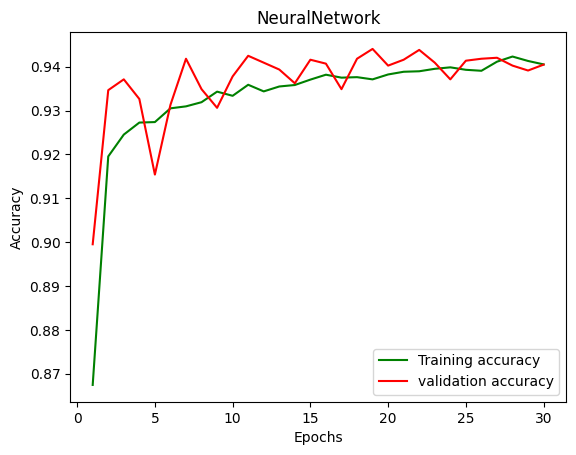

In [ ]:
acc_train = nn.history['accuracy']
acc_val = nn.history['val_accuracy']
epochs = range(1,no_epochs + 1)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'r', label='validation accuracy')
plt.title('NeuralNetwork')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Neural network is good fit.

In [ ]:
fit = pd.DataFrame({'Model':['LogisticRegression','SVM','GuassianNaiveBayes','K-NN','ExtraTree','RandomForest','DecisionTree','Lightgbm','Xgboost', 'NeuralNetwork'],
                    'Fitting': ['Good','Good','Good','Over','Over','Over','Over','Over','Over','Good']})
fit

,Model,Fitting
0,LogisticRegression,Good
1,SVM,Good
2,GuassianNaiveBayes,Good
3,K-NN,Over
4,ExtraTree,Over
5,RandomForest,Over
6,DecisionTree,Over
7,Lightgbm,Over
8,Xgboost,Over
9,NeuralNetwork,Good


# Evaluation

In [ ]:

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for name in models:
    model = name
    Y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision =  metrics.precision_score(Y_test, Y_pred, average = "macro")
    recall = metrics.recall_score(Y_test, Y_pred, average = "macro")
    f1_score = metrics.f1_score(Y_test, Y_pred, average = "macro")

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

In [ ]:
evaluation_classic = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision' : precision_list,
                           'Recall' : recall_list,
                           'F1 Score': f1_score_list
                           })


In [ ]:
Y_pred_nn = np.argmax((nn_model.predict(X_test)), axis=1)

78/78 [==============================] - 0s 1ms/step


In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred_nn)
precision =  metrics.precision_score(Y_test, Y_pred_nn , average = "macro")
recall = metrics.recall_score(Y_test, Y_pred_nn, average = "macro")
f1_score = metrics.f1_score(Y_test, Y_pred_nn, average = "macro")

new_row = {'Model':'Neural Network', 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1 Score': f1_score}
evaluation_all = evaluation_classic.append(new_row, ignore_index=True)
evaluation_all['Fitting'] = fit['Fitting']

In [ ]:
evaluation_all

,Model,Accuracy,Precision,Recall,F1 Score,Fitting
0,LogisticRegression,0.944019,0.944300,0.944305,0.944137,Good
1,SVM,0.952477,0.952873,0.952760,0.952625,Good
2,GuassianNaiveBayes,0.919452,0.920638,0.920325,0.919866,Good
3,K-NN,0.956101,0.956163,0.956263,0.956141,Over
4,ExtraTree,0.921869,0.921627,0.922189,0.921632,Over
5,RandomForest,0.957310,0.957352,0.957470,0.957351,Over
6,DecisionTree,0.940395,0.940554,0.940469,0.940364,Over
7,Lightgbm,0.960129,0.960192,0.960210,0.960141,Over
8,Xgboost,0.959323,0.959391,0.959416,0.959340,Over
9,Neural Network,0.948852,0.949992,0.948751,0.948868,Good


In [ ]:
evaluation_all.loc[evaluation_all['Fitting'] == 'Good']

,Model,Accuracy,Precision,Recall,F1 Score,Fitting
0,LogisticRegression,0.944019,0.944300,0.944305,0.944137,Good
1,SVM,0.952477,0.952873,0.952760,0.952625,Good
2,GuassianNaiveBayes,0.919452,0.920638,0.920325,0.919866,Good
9,Neural Network,0.948852,0.949992,0.948751,0.948868,Good


In [ ]:
colors = []
for fit_value in evaluation_all['Fitting']:
    if fit_value == 'Good':
        colors.append('r')
    else:
        colors.append('b')

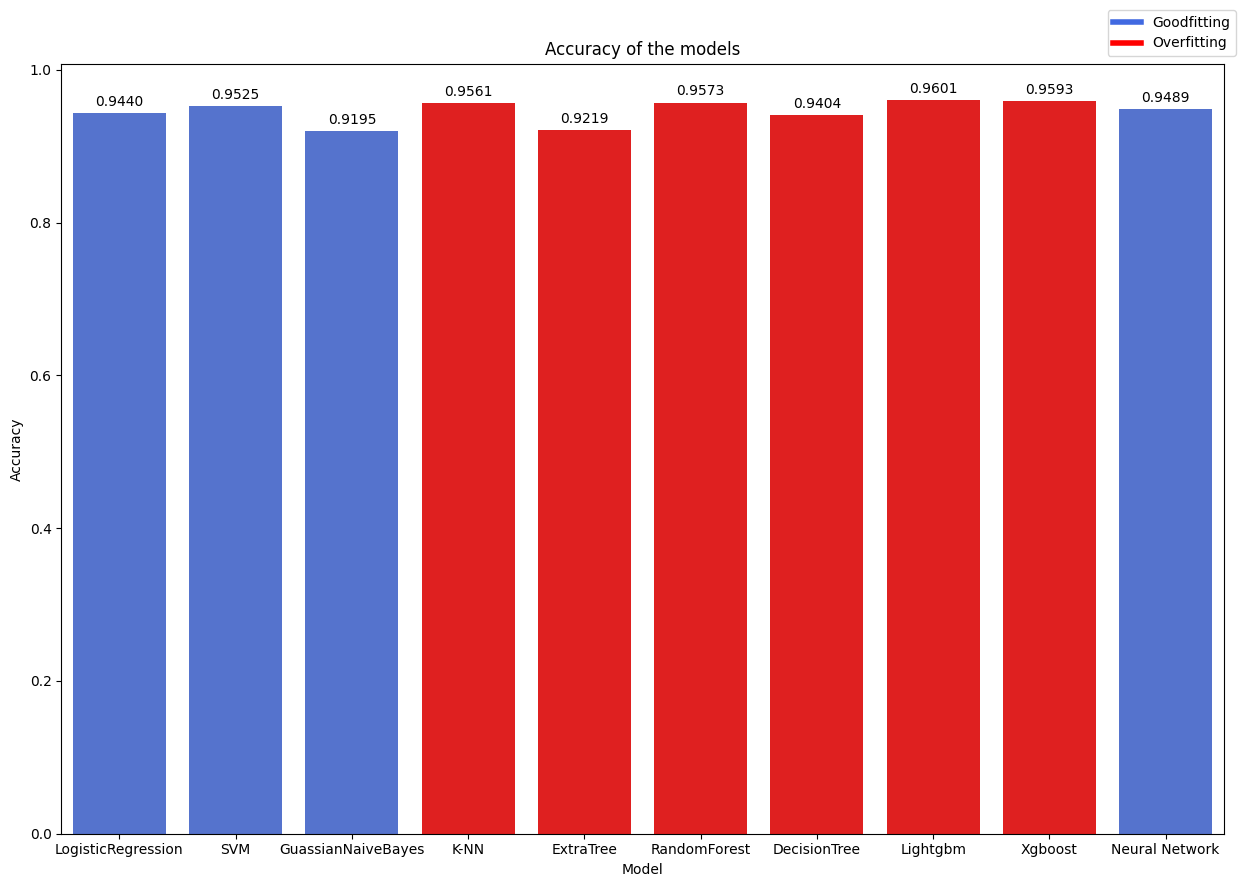

In [ ]:
from matplotlib.lines import Line2D
plt.figure(figsize=(15, 10))
#sns.color_palette("ch:start=.2,rot=.3", as_cmap=True)
colors = []
for fit_value in evaluation_all['Fitting']:
    if fit_value == 'Good':
        colors.append('royalblue')
    else:
        colors.append('red')


ax = sns.barplot(x="Model", y="Accuracy", data=evaluation_all, palette = colors )

plt.title('Accuracy of the models')

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

show_values(ax)
legend_elements = [Line2D([0], [0], color='royalblue', lw=4, label='Goodfitting'),
                   Line2D([0], [0], color='red', lw=4, label='Overfitting')]

#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.legend(handles=legend_elements, loc=(0.9,1.01))
plt.show()

All the models achieve accuracy higher than 90% which means all models is good. However, some models are overfittinh such as KNN, ExtraTree, RandomForest, DecisionTree, Lightgbm and Xgboost. The remaining good fitted model is Logistic regression, SVM, GaussianNaiveBayes and Neural Network. Hyperparameter tuning for these 4 models are computationally expensive. Therefore, We select only 1 best model and tune the model to improve the accuracy further. Among these models, SVM shows the highest accuracy. Therefore, SVM will be tuned.

## Hyperparameter tunning for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {'kernel': ('sigmoid', 'rbf','poly') ,
              'C':[1,5, 10],
              'gamma': ('scale', 'auto')}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)


grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  45.2s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  43.7s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  43.6s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  43.2s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=  44.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.9s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   1.6s
[CV] END ......................C=1, gamma=scale,

Best parameter is C :5, gamma: scale, kernel:poly.

In [ ]:
grid_svc = grid.predict(X_test)

acc_hyper = metrics.accuracy_score(Y_test, grid_svc)
print(acc_hyper)
print()

0.9577124446234394



In [ ]:
best_model = SVC(C= 10, gamma= 'scale', kernel= 'poly')
best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,Y_pred)
precision =  metrics.precision_score(Y_test, Y_pred , average = "macro")
recall = metrics.recall_score(Y_test, Y_pred, average = "macro")
f1_score = metrics.f1_score(Y_test, Y_pred, average = "macro")


In [ ]:
evaluation_tuning = pd.DataFrame({'Model': ['SVM'],
                           'Accuracy': accuracy,
                           'Precision': precision,
                           'Recall': recall,
                           'F1 Score': f1_score })

evaluation_tuning

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.957712,0.957927,0.957859,0.957773


Accuracy increase from 0.9476 to 0.9509. Not have significant different but still good for short execution time for hyperparameter tuning.

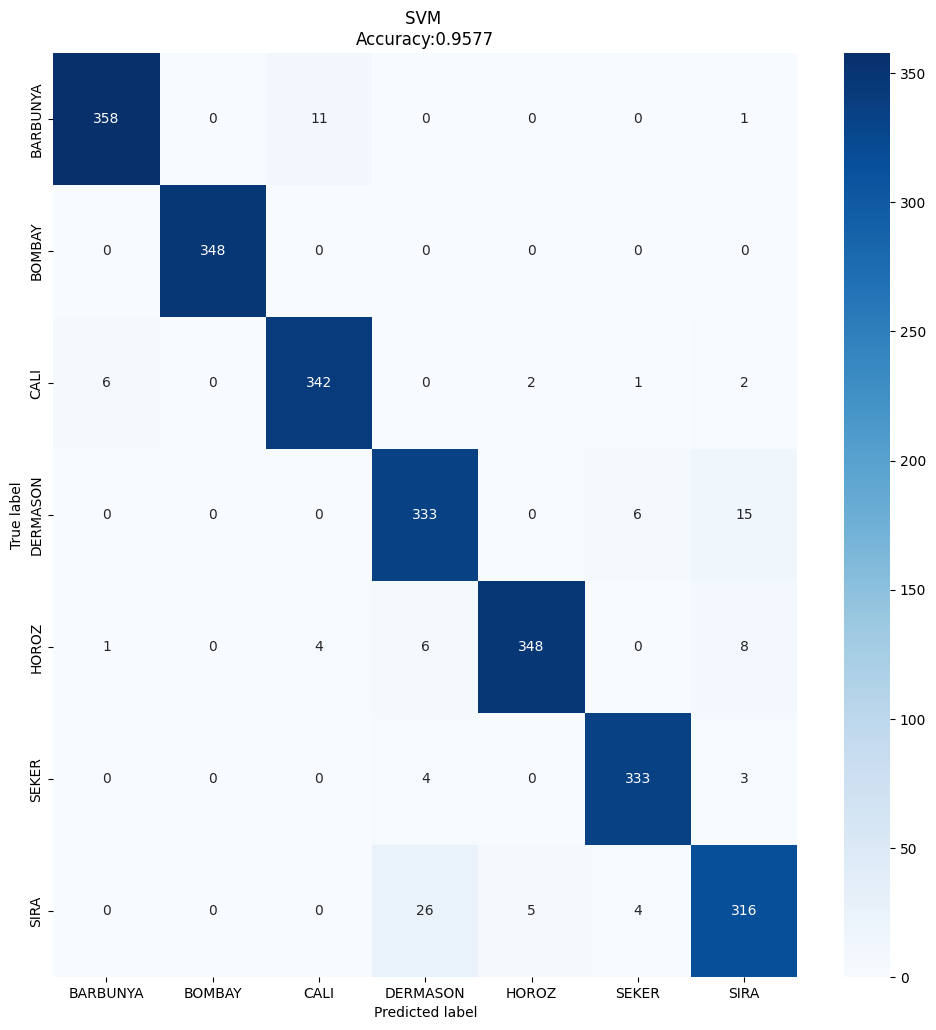

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

cm_df = pd.DataFrame(cm, index = ['BARBUNYA', 'BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA' ],
                     columns =['BARBUNYA', 'BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA' ])

plt.figure(figsize=(12,12))
sns.heatmap(cm_df, cmap = "Blues", annot=True, fmt='.4g')
plt.title('SVM \nAccuracy:{0:.4f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

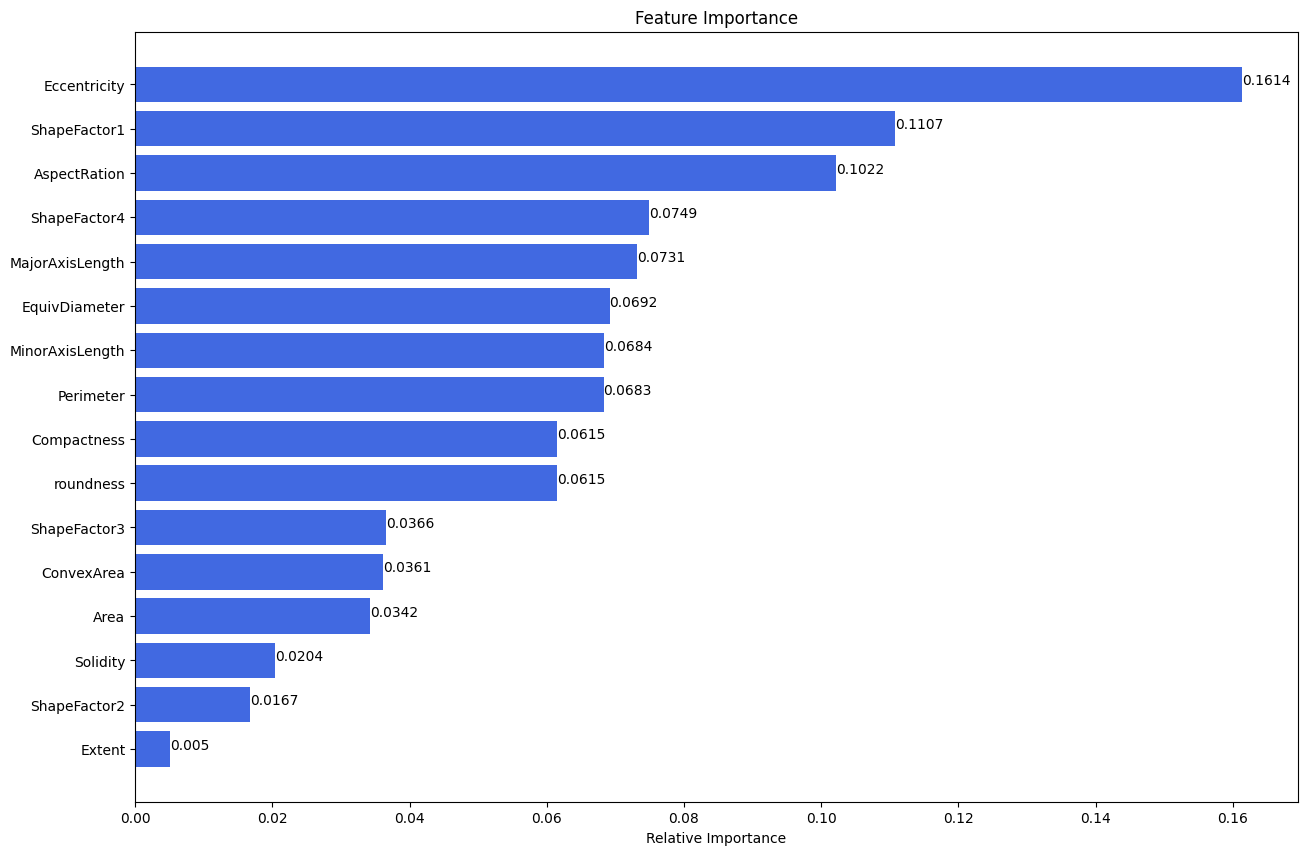

In [ ]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

perm_importance = permutation_importance(best_model, X, Y)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='royalblue', align='center')
plt.xlabel('Relative Importance')
plt.xticks()
plt.yticks()

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,4)))

plt.show()

From the best models, the feature importance is obtained. In ascending order are Extent, Solidity, ShapeFactor2,  ShapeFactor3, ConvexArea, Area, Compactness, MinorAxisLength, roundness,  Perimeter, EquiveDiameter,ShapeFactor4, MajorAxisLength, ShapeFactor1, AspectRation and  Eccentricity.
